In [2]:
    import importnb
    with importnb.Notebook():
        try: 
            from .schemas import Object
        except: 
            from schemas import Object


In [4]:
    import pandas

In [5]:
    class Pandas(Object): 
        def _repr_mimebundle_(x, include=None, exclude=None):
            data, metadata = super()._repr_mimebundle_(include, exclude)
            return data, {**metadata, 'allOf':[
                TableSchema(__import__('json').loads(x.object.to_json(orient='table'))['schema']),
                List.new(minItems=len(x.object), maxItems=len(x.object)).__schema__,]}
        
    Pandas.register(pandas.DataFrame), Pandas.register(pandas.Series)
    
    class Module(Object): 
        def _repr_mimebundle_(x, include=None, exclude=None):
            data, metadata = super()._repr_mimebundle_(include, exclude)
            return data, {**metadata, "title": x.object.__name__, "description": x.object.__doc__ or '', "@id": getattr(x.object, '__file__', '')}
    Module.register(__import__('types').ModuleType)

module

In [6]:
    class Test(__import__('unittest').TestCase):
        def test_instances(x): ...

In [7]:
    def load_tests(loader, tests, ignore): tests.addTests(doctest.DocTestSuite(importlib.import_module(__name__), optionflags=doctest.ELLIPSIS)); return tests
    if __name__ == '__main__': 
        import unittest, pytest, jsonschema, importlib, doctest
        unittest.main(argv=' ', exit=False, verbosity=1)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


[NbConvertApp] Converting notebook objects.ipynb to script
[NbConvertApp] Writing 1784 bytes to objects.py
reformatted objects.py
All done! ✨ 🍰 ✨
1 file reformatted.
parsing /Users/tonyfast/xxxxx/tonyfast/jschema/objects.py...


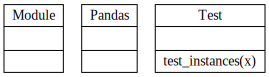

In [9]:
    if __name__ == '__main__': 
        !jupyter nbconvert --to script objects.ipynb
        !black objects.py
        !pyreverse objects -osvg -pobjects
        display(__import__('IPython').display.SVG('classes_objects.svg'))        
        !rm classes_objects.svg objects.py